In [1]:
%matplotlib inline 
import matplotlib.pylab as plt
import pandas as pd 
import numpy as np 
import pickle
import datetime as dt
import matplotlib.cm as cm
import random
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15, 9

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
ls

Demo.ipynb                 occupancy_by_location.b
Untitled.ipynb             occupency_stats.ipynb
Untitled1.ipynb            parking.csv
Untitled2.ipynb            parse_transactions.py
arma.ipynb                 paystations.json
elem_keys_to_blocks.py     populate_AWS.py
explore_data.ipynb         streets.json
get_elemkeys.py            test.py
get_transactions.py        timeseries_analysis.ipynb
gradient boost.ipynb       ts_net.ipynb
hist.b                     usedblocks.p
lily.py                    weather_data.ipynb
load_pickle.py             web_service.py
nn.py                      yearly_analysis.pdf


In [52]:
# Create Data Frame

path = '../datastore/'
w = pd.read_csv(path + 'weather-2-23-to3-3-s3.0.csv', )
start_day = '2-23-2015'; end_day = '3-3-2016'

w.index = pd.to_datetime(w['DATE'], format='%Y%m%d')

# df['column'].dt.date
# make timeseries dataframe
w

ValueError: labels ['DATE'] not contained in axis

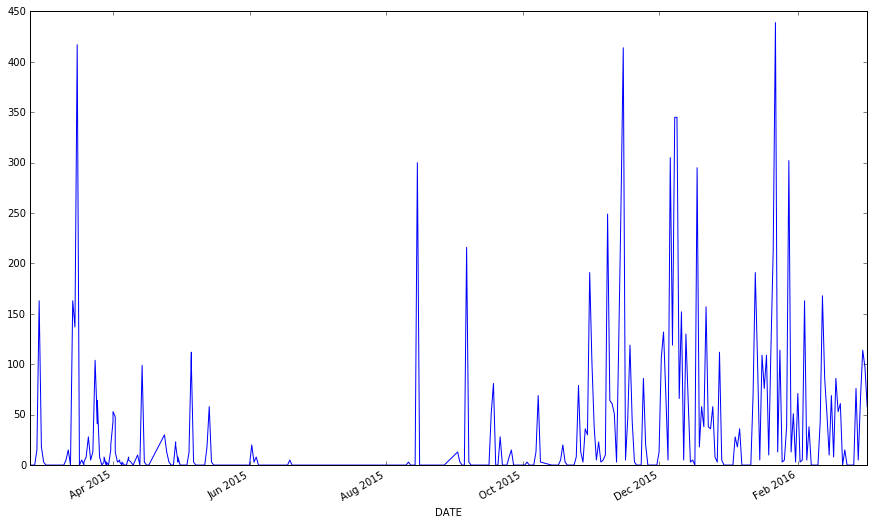

In [44]:

w.PRCP.plot()


,WT01,WT05,WT02,WT11,WT08,WT03
DATE,,,,,,
2015-03-19,0,0,0,0,0,0
2015-03-20,0,0,0,0,0,0
2015-03-21,0,0,0,0,0,0
2015-03-22,0,0,0,0,0,0
2015-03-23,0,0,0,0,0,0
2015-03-24,0,0,0,0,0,0
2015-03-25,0,0,0,0,0,0
2015-03-28,0,0,0,0,0,0
2015-03-29,0,0,0,0,0,0


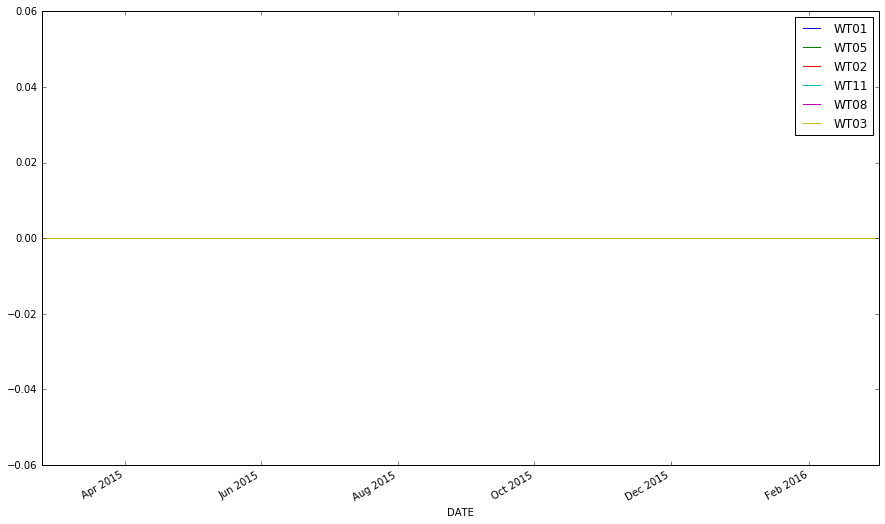

In [48]:
w[w < 0] = 0

binary = w[['WT01','WT05','WT02','WT11','WT08','WT03']]
binary.plot()
binary